In [1]:
!pip install networkx


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import csv

def translate_station_names(filename, translation_dict):
    translated_rows = []
    with open(filename, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  
        translated_rows.append(header)  
        for row in reader:
            translated_row = [translation_dict.get(item, item) for item in row]
            translated_rows.append(translated_row)
    
    with open(filename, 'w', encoding='utf-8', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerows(translated_rows)

translation_dict = {
    '강남': 'Gangnam',
    '잠실(송파구청)': 'Jamsil (Songpa-gu Office)',
    '구로디지털단지': 'Guro Digital Complex',
    '신림': 'Sillim',
    '역삼': 'Yeoksam',
    '선릉': 'Seolleung',
    '서울대입구(관악구청)': 'Seoul National University Entrance (Gwanak-gu Office)',
    '삼성(무역센터)': 'Samsung (World Trade Center Seoul)',
    '여의도': 'Yeouido',
    '사당': 'Sadang',
    '강변(동서울터미널)': 'Gangbyeon (Dong Seoul Bus Terminal)',
    '교대(법원.검찰청)': 'Seoul Nat Univ. of Education',
    '홍대입구': 'Hongik University Entrance',
    '을지로입구': 'Euljiro Entrance',
    '수유(강북구청)': 'Suyu (Gangbuk-gu Office)',
    '화곡': 'Hwagok',
    '낙성대(강감찬)': 'Naksongdae',
    '신도림': 'Sindorim',
    '성수': 'Seongsu',
    '건대입구':'Konkuk University Entrance'
}


filename = 'OD.csv'

translate_station_names(filename, translation_dict)


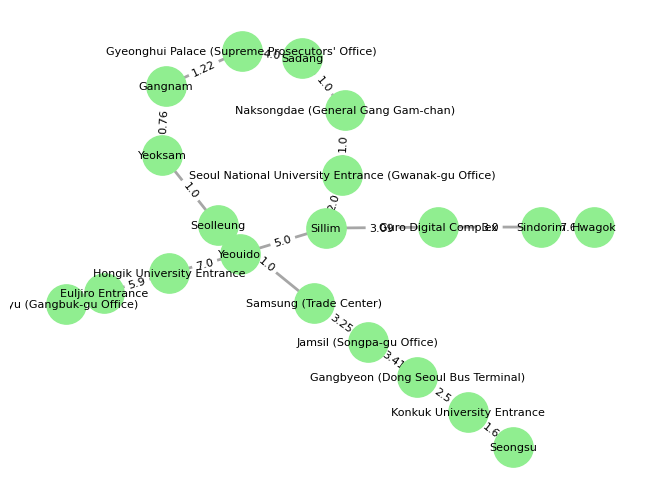

크루스칼 알고리즘 결과를 'mst_result.csv' 파일로 저장했습니다.


In [3]:
import csv
import networkx as nx
import matplotlib.pyplot as plt


def read_distances(filename):
    with open(filename, 'r', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        distances = [(row[0], row[1], float(row[2])) for row in reader]
    return distances


def kruskal(distances):
    G = nx.Graph()

    for (station1, station2, distance) in distances:
        G.add_edge(station1, station2, weight=distance)

    mst = nx.minimum_spanning_tree(G, weight='weight',algorithm='kruskal')
    return mst

if __name__ == '__main__':
    filename = 'OD.csv'  
    distances = read_distances(filename)

    mst = kruskal(distances)

 
    pos = nx.spring_layout(mst, seed=42) 
    nx.draw(mst, pos, with_labels=False, node_color='lightgreen', node_size=800, edgelist=[])
    
    
    edges = list(mst.edges(data='weight'))
    edges.sort(key=lambda x: x[2]) 
    edge_labels = {(station1, station2): str(distance) for (station1, station2, distance) in edges}
    nx.draw_networkx_edges(mst, pos, edgelist=edges, width=2, alpha=0.7, edge_color='gray')
    nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels, font_size=8)
    

    node_labels = {node: node for node in mst.nodes}
    nx.draw_networkx_labels(mst, pos, labels=node_labels, font_size=8)
    
    plt.axis('off')
    plt.show()
    
def save_mst_to_csv(mst, filename):
    with open(filename, 'w', encoding='utf-8', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Source', 'Target', 'Weight'])
        
        edges = list(mst.edges(data='weight'))
        edges.sort(key=lambda x: x[2])
        
        total_sum = 0
        
        for edge in edges:
            source, target, weight = edge
            total_sum += weight
            writer.writerow([source, target, weight])
        
        writer.writerow(['Total', '', total_sum])

    
    
if __name__ == '__main__':
    filename = 'OD.csv'  
    distances = read_distances(filename)

    mst = kruskal(distances)

    result_filename = 'mst_result.csv' 
    save_mst_to_csv(mst, result_filename)

    print("크루스칼 알고리즘 결과를 '{}' 파일로 저장했습니다.".format(result_filename))